In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
df = pd.read_parquet('/content/[2017, 2018]_game_stats.parquet.gzip')

In [44]:
df.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Oct 25, 2016",CLE,45,94,.479,13,35,.371,14,19,...,13,29,42,17,6,6,18,22,88,Quicken Loans Arena
1,"Tue, Oct 25, 2016",POR,39,75,.520,13,19,.684,22,22,...,6,25,31,19,9,5,11,19,104,Moda Center
2,"Tue, Oct 25, 2016",GSW,40,85,.471,7,33,.212,13,18,...,21,34,55,25,13,3,13,19,129,Oracle Arena
3,"Wed, Oct 26, 2016",IND,47,93,.505,10,19,.526,26,34,...,10,39,49,26,8,8,15,27,121,Bankers Life Fieldhouse
4,"Wed, Oct 26, 2016",ORL,34,89,.382,6,18,.333,22,28,...,16,36,52,27,5,7,10,22,108,Amway Center


In [53]:
df.tail()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
2455,2018-04-11,ORL,33,77,0.429,13,32,0.406,22,27,...,18,32,50,17,5,1,12,25,92,Amway Center
2456,2018-04-11,PHI,52,105,0.495,15,36,0.417,11,15,...,10,33,43,22,6,5,20,17,95,Wells Fargo Center
2457,2018-04-11,LAC,41,83,0.494,6,18,0.333,12,28,...,10,39,49,25,8,6,17,23,115,STAPLES Center
2458,2018-04-11,POR,41,89,0.461,9,24,0.375,11,16,...,14,39,53,18,5,7,14,19,93,Moda Center
2459,2018-04-11,SAC,38,80,0.475,7,26,0.269,13,20,...,8,32,40,11,2,6,14,24,83,Golden 1 Center


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2460 non-null   object
 1   home_team     2460 non-null   object
 2   home_fg       2460 non-null   object
 3   home_fga      2460 non-null   object
 4   home_fg_pct   2460 non-null   object
 5   home_fg3      2460 non-null   object
 6   home_fg3a     2460 non-null   object
 7   home_fg3_pct  2460 non-null   object
 8   home_ft       2460 non-null   object
 9   home_fta      2460 non-null   object
 10  home_ft_pct   2460 non-null   object
 11  home_orb      2460 non-null   object
 12  home_drb      2460 non-null   object
 13  home_trb      2460 non-null   object
 14  home_ast      2460 non-null   object
 15  home_stl      2460 non-null   object
 16  home_blk      2460 non-null   object
 17  home_tov      2460 non-null   object
 18  home_pf       2460 non-null   object
 19  home_p

**There are no missing items but Let's isolate the features that need to be converted to numeric columns and updated the dataframe.**

In [46]:
# convert appropriate columns to numeric values.
columns = df.columns
date_features = ['date']
string_features = [ 'home_team', 'away_team', 'arena']
numeric_features = [ c for c in columns if c not in string_features + date_features]

df[numeric_features] = df[numeric_features].apply(pd.to_numeric)
df[date_features] = df[date_features].apply(pd.to_datetime)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2460 non-null   datetime64[ns]
 1   home_team     2460 non-null   object        
 2   home_fg       2460 non-null   int64         
 3   home_fga      2460 non-null   int64         
 4   home_fg_pct   2460 non-null   float64       
 5   home_fg3      2460 non-null   int64         
 6   home_fg3a     2460 non-null   int64         
 7   home_fg3_pct  2460 non-null   float64       
 8   home_ft       2460 non-null   int64         
 9   home_fta      2460 non-null   int64         
 10  home_ft_pct   2460 non-null   float64       
 11  home_orb      2460 non-null   int64         
 12  home_drb      2460 non-null   int64         
 13  home_trb      2460 non-null   int64         
 14  home_ast      2460 non-null   int64         
 15  home_stl      2460 non-null   int64   

In [48]:
df.describe()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,39.773577,85.684146,0.465201,10.201626,28.048374,0.363426,17.526829,22.782114,0.770216,10.006911,...,0.769476,9.841870,33.104065,42.945935,22.320732,7.705285,4.583740,13.595528,20.206504,104.648374
std,5.004304,6.996995,0.053999,3.507269,6.749670,0.092378,6.014596,7.326000,0.101155,3.713887,...,0.103604,3.679377,5.294858,6.333802,5.151702,2.916301,2.413004,3.777814,4.307379,12.237065
min,21.000000,62.000000,0.282000,1.000000,7.000000,0.056000,1.000000,1.000000,0.143000,1.000000,...,0.176000,0.000000,18.000000,22.000000,7.000000,0.000000,0.000000,3.000000,8.000000,68.000000
25%,36.000000,81.000000,0.429000,8.000000,23.750000,0.300000,13.000000,18.000000,0.708000,7.000000,...,0.704000,7.000000,29.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,96.000000
50%,40.000000,86.000000,0.463000,10.000000,27.000000,0.360000,17.000000,22.000000,0.778000,10.000000,...,0.778000,10.000000,33.000000,43.000000,22.000000,8.000000,4.000000,13.000000,20.000000,105.000000
75%,43.000000,90.000000,0.500000,12.000000,32.000000,0.423000,21.000000,27.000000,0.839000,12.000000,...,0.842000,12.000000,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,113.000000
max,57.000000,119.000000,0.639000,24.000000,61.000000,0.684000,41.000000,64.000000,1.000000,26.000000,...,1.000000,26.000000,56.000000,68.000000,46.000000,19.000000,15.000000,27.000000,42.000000,148.000000


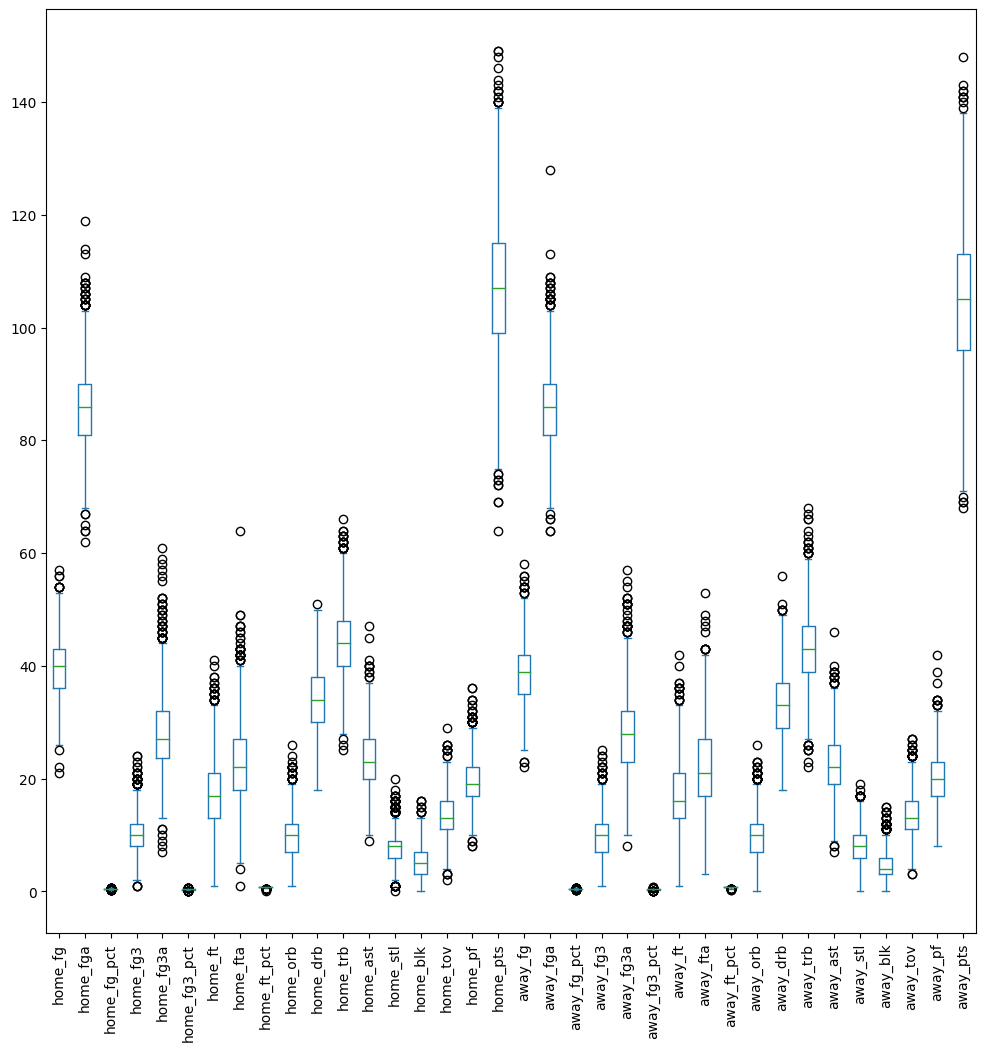

In [49]:
df[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

**There are quite a few outliers. They can probably be fixed by running a log function on the numeric values. See EDA directory for correlation_table excel file.**

In [50]:
df[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.440849,0.772822,0.298114,0.042391,0.357310,-0.200567,-0.193103,-0.045290,0.031352,...,0.025611,0.023896,-0.346183,-0.275517,0.146426,-0.085300,-0.143663,0.066505,-0.145477,0.259298
home_fga,0.440849,1.000000,-0.223978,0.033701,0.231207,-0.178588,-0.219555,-0.202790,-0.079140,0.520885,...,-0.011547,-0.043564,0.406096,0.314177,0.168090,-0.167568,0.267710,0.155643,-0.112339,0.273293
home_fg_pct,0.772822,-0.223978,1.000000,0.300104,-0.116193,0.516655,-0.059923,-0.063266,0.006835,-0.330839,...,0.036487,0.058270,-0.659302,-0.517306,0.040375,0.027967,-0.341394,-0.036677,-0.074771,0.090829
home_fg3,0.298114,0.033701,0.300104,1.000000,0.699808,0.701274,-0.122789,-0.132251,0.008929,-0.143192,...,-0.014090,-0.021888,-0.118814,-0.112040,0.071684,-0.011126,-0.105308,-0.058726,-0.141875,0.100424
home_fg3a,0.042391,0.231207,-0.116193,0.699808,1.000000,0.012347,-0.093559,-0.094282,-0.008656,0.017361,...,-0.035208,-0.039238,0.211827,0.154287,0.102530,-0.016382,-0.065655,0.014372,-0.079696,0.120790
home_fg3_pct,0.357310,-0.178588,0.516655,0.701274,0.012347,1.000000,-0.072441,-0.087966,0.030978,-0.215750,...,0.012272,0.012682,-0.363388,-0.296414,-0.004493,0.003740,-0.082562,-0.086871,-0.118026,0.018640
home_ft,-0.200567,-0.219555,-0.059923,-0.122789,-0.093559,-0.072441,1.000000,0.930989,0.319802,0.052033,...,0.061795,0.016207,-0.082746,-0.059758,0.039522,-0.006076,0.001330,0.028156,0.725420,0.209043
home_fta,-0.193103,-0.202790,-0.063266,-0.132251,-0.094282,-0.087966,0.930989,1.000000,-0.026268,0.093771,...,0.064413,0.022091,-0.024262,-0.007449,0.042475,-0.007765,0.012857,0.034930,0.787242,0.214454
home_ft_pct,-0.045290,-0.079140,0.006835,0.008929,-0.008656,0.030978,0.319802,-0.026268,1.000000,-0.097337,...,0.007313,-0.019326,-0.161085,-0.145888,-0.012769,-0.001076,-0.036504,-0.014057,-0.037608,0.002120
home_orb,0.031352,0.520885,-0.330839,-0.143192,0.017361,-0.215750,0.052033,0.093771,-0.097337,1.000000,...,-0.009412,-0.033698,-0.069337,-0.077539,0.000245,0.042241,0.220545,0.053792,0.084056,0.019319


In [51]:
for cat in string_features:
    print(df[cat].value_counts())
    print('='*100)

CLE    82
POR    82
MIN    82
HOU    82
LAC    82
DEN    82
SAS    82
NYK    82
CHO    82
UTA    82
DAL    82
MIA    82
OKC    82
DET    82
BRK    82
SAC    82
CHI    82
ATL    82
LAL    82
PHO    82
PHI    82
MEM    82
NOP    82
MIL    82
BOS    82
TOR    82
ORL    82
IND    82
GSW    82
WAS    82
Name: home_team, dtype: int64
NYK    82
UTA    82
PHI    82
CHI    82
MIL    82
POR    82
NOP    82
MEM    82
ATL    82
GSW    82
LAL    82
PHO    82
ORL    82
IND    82
CLE    82
LAC    82
BOS    82
WAS    82
HOU    82
SAC    82
OKC    82
MIN    82
DEN    82
CHO    82
BRK    82
DET    82
MIA    82
DAL    82
SAS    82
TOR    82
Name: away_team, dtype: int64
STAPLES Center                164
Quicken Loans Arena            82
Golden 1 Center                82
Target Center                  82
Toyota Center                  82
AT&T Center                    82
Madison Square Garden (IV)     82
Spectrum Center                82
Vivint Smart Home Arena        82
American Airlines Center       82


In [52]:
df.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,2016-10-25,CLE,45,94,0.479,13,35,0.371,14,19,...,13,29,42,17,6,6,18,22,88,Quicken Loans Arena
1,2016-10-25,POR,39,75,0.520,13,19,0.684,22,22,...,6,25,31,19,9,5,11,19,104,Moda Center
2,2016-10-25,GSW,40,85,0.471,7,33,0.212,13,18,...,21,34,55,25,13,3,13,19,129,Oracle Arena
3,2016-10-26,IND,47,93,0.505,10,19,0.526,26,34,...,10,39,49,26,8,8,15,27,121,Bankers Life Fieldhouse
4,2016-10-26,ORL,34,89,0.382,6,18,0.333,22,28,...,16,36,52,27,5,7,10,22,108,Amway Center


## Observations

It appears there are some correlations and I have included an excel sheet in the EA directory which is color coded to show the strongest correlations.

The dates may be off. After correcting the date column, I noticed that the dates for the 2017 - 2018 begin in 2016. these may be the source of some of the outliers I have observed. But it may indicate some issues with the scraping tool. We may have to drop some of these items from the dataset or fix the tool.

We should be able to transform the home team and away team using some sort of ordinal encoding where 1 stands for home team and 2 stands for away team and 0 means the team is excluded.

There were quite a few outliers in the data and these may be fixable by using a log process on the values.